<a href="https://colab.research.google.com/github/aswa09/EVA-4/blob/master/S8/EVA4_S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [2]:
import torch
!pip install torchsummary
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
import sys
import torch.nn as nn
import os

##Mount Google Drive to get files

In [4]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [5]:
!rm -rf '/content/drive/My Drive/colab_notebooks/S8/__pycache__'
!ls -lrt '/content/drive/My Drive/colab_notebooks/S8/'

total 27
-rw------- 1 root root  1211 May 18 18:54 train_test_loader.py
-rw------- 1 root root   594 May 18 23:14 visualise_loss_acc.py
-rw------- 1 root root  4074 May 21 17:05 resnet18.py
drwx------ 2 root root  4096 May 21 18:00 data
-rw------- 1 root root  1512 May 21 20:44 training.py
-rw------- 1 root root  1332 May 21 22:04 testing.py
-rw------- 1 root root 13709 May 22 12:26 EVA4_S8.ipynb


##Add Google Drive path to system path

In [6]:
os.chdir('./drive/My Drive/colab_notebooks/S8/')

!ls

data	       resnet18.py  training.py		  visualise_loss_acc.py
EVA4_S8.ipynb  testing.py   train_test_loader.py


##Import python files

In [0]:
import train_test_loader as ttl
import resnet18 as bm
import training as trn
import testing as tst
import visualise_loss_acc as vis

##Main Function

In [0]:
def main(classes):

  train_loader, test_loader = ttl.get_train_test(classes)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  print(device)

  model = bm.ResNet18().to(device)
  summary(model, input_size=(3, 32, 32))

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  # scheduler = StepLR(optimizer, step_size=35, gamma=0.1)
  EPOCHS=25
 
  test_loss=[]
  test_accuracy=[]
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch + 1)
      train_losses,train_acc=trn.train(model, device, train_loader, optimizer,EPOCHS,criterion,l1=1e-6,l2=1e-3)
      # scheduler.step()
      test_losses,test_acc=tst.test(model, device, test_loader,criterion)

      test_loss.append(test_losses)
      test_accuracy.append(test_acc)
  
  vis.plot_acc_loss(test_loss,test_accuracy)
  print(test_loss)
  print(test_accuracy)

##Calling Main

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified
cuda


  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Loss=1.498593807220459 Batch_id=390 Accuracy=53.46: 100%|██████████| 391/391 [01:02<00:00,  6.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6435/10000 (64.35%)

EPOCH: 2


Loss=1.2766072750091553 Batch_id=390 Accuracy=73.13: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7195/10000 (71.95%)

EPOCH: 3


Loss=1.3151299953460693 Batch_id=390 Accuracy=80.42: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7337/10000 (73.37%)

EPOCH: 4


Loss=0.8636184930801392 Batch_id=390 Accuracy=84.05: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7832/10000 (78.32%)

EPOCH: 5


Loss=1.121225357055664 Batch_id=390 Accuracy=87.16: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7849/10000 (78.49%)

EPOCH: 6


Loss=0.797761857509613 Batch_id=390 Accuracy=88.97: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8100/10000 (81.00%)

EPOCH: 7


Loss=0.8743716478347778 Batch_id=390 Accuracy=90.96: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8161/10000 (81.61%)

EPOCH: 8


Loss=0.691514253616333 Batch_id=390 Accuracy=92.66: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8070/10000 (80.70%)

EPOCH: 9


Loss=0.6620137095451355 Batch_id=390 Accuracy=93.88: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8449/10000 (84.49%)

EPOCH: 10


Loss=0.7498916387557983 Batch_id=390 Accuracy=94.67: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8385/10000 (83.85%)

EPOCH: 11


Loss=0.9460769891738892 Batch_id=390 Accuracy=95.40: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8402/10000 (84.02%)

EPOCH: 12


Loss=0.643348217010498 Batch_id=390 Accuracy=96.36: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8289/10000 (82.89%)

EPOCH: 13


Loss=0.6700814962387085 Batch_id=390 Accuracy=97.05: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8493/10000 (84.93%)

EPOCH: 14


Loss=0.6364498734474182 Batch_id=390 Accuracy=97.33: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8392/10000 (83.92%)

EPOCH: 15


Loss=0.6811479330062866 Batch_id=390 Accuracy=97.76: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8467/10000 (84.67%)

EPOCH: 16


Loss=0.6220954060554504 Batch_id=390 Accuracy=97.98: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8536/10000 (85.36%)

EPOCH: 17


Loss=0.6510263681411743 Batch_id=390 Accuracy=98.08: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8269/10000 (82.69%)

EPOCH: 18


Loss=0.6212942600250244 Batch_id=390 Accuracy=98.31: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8472/10000 (84.72%)

EPOCH: 19


Loss=0.6226872205734253 Batch_id=390 Accuracy=98.47: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8520/10000 (85.20%)

EPOCH: 20


Loss=0.5922224521636963 Batch_id=390 Accuracy=98.43: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8555/10000 (85.55%)

EPOCH: 21


Loss=0.5843884944915771 Batch_id=390 Accuracy=98.99: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 8473/10000 (84.73%)

EPOCH: 22


Loss=0.6489960551261902 Batch_id=390 Accuracy=98.85: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8611/10000 (86.11%)

EPOCH: 23


Loss=0.5805737972259521 Batch_id=390 Accuracy=99.13: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8599/10000 (85.99%)

EPOCH: 24


Loss=0.5930598974227905 Batch_id=390 Accuracy=99.18: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8551/10000 (85.51%)

EPOCH: 25


Loss=0.6039432883262634 Batch_id=390 Accuracy=99.22: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]



Test set: Average loss: 0.0050, Accuracy: 8637/10000 (86.37%)

[[0.008014726251363754], [0.006573524695634842], [0.006195597568154335], [0.005074694409966469], [0.005435742837190628], [0.004708779934048652], [0.004708913999795914], [0.004994919443130493], [0.004073838403820991], [0.00425337730050087], [0.004674201300740242], [0.005344291365146637], [0.004733038166165352], [0.0050302687644958495], [0.004825913336873055], [0.004699114787578583], [0.006410761776566506], [0.005162058734893799], [0.004971402582526207], [0.005012919820845127], [0.005567184169590473], [0.004804032096266747], [0.004867855539917946], [0.005322190421819687], [0.004970078665018082]]
[[64.35], [71.95], [73.37], [78.32], [78.49], [81.0], [81.61], [80.7], [84.49], [83.85], [84.02], [82.89], [84.93], [83.92], [84.67], [85.36], [82.69], [84.72], [85.2], [85.55], [84.73], [86.11], [85.99], [85.51], [86.37]]


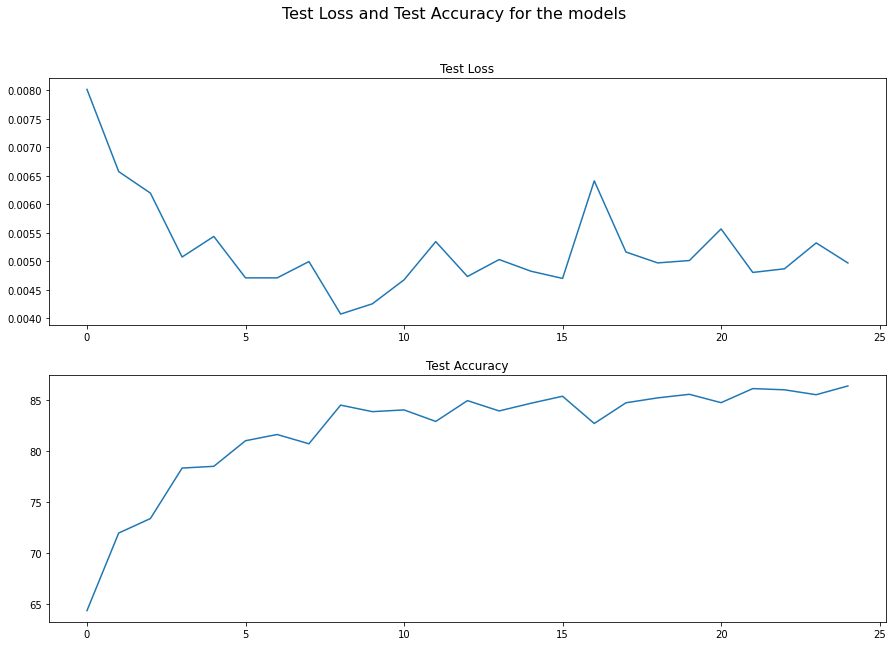

In [9]:
if __name__ == '__main__':
  from tqdm import tqdm
  if hasattr(tqdm, '_instances'):
    tqdm._instances.clear()

  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')
  
  main(classes)